REGION:  interior
CONVEXITY:  strong
REGION:  exterior
CONVEXITY:  not uniformly convex
REGION:  boundary
CONVEXITY:  strong


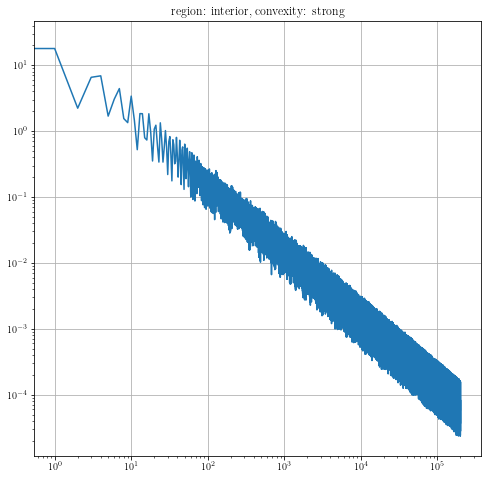

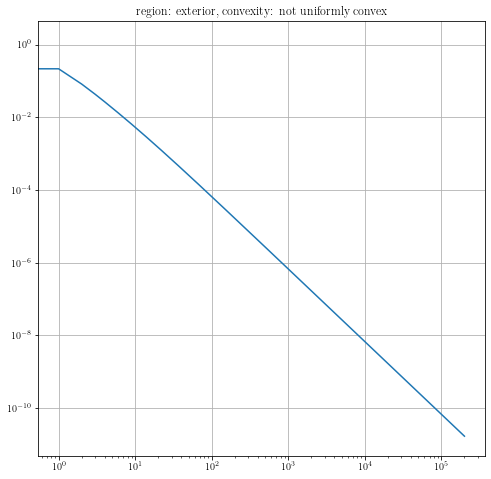

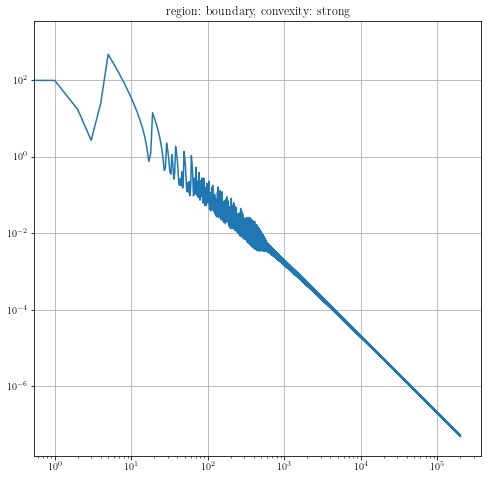

In [11]:
from all_functions.frank_wolfe import frank_wolfe
from all_functions.problem_settings import uniformly_convex
from global_ import *
import matplotlib.pyplot as plt

parameters = [("interior", "strong"), ("exterior", "not uniformly convex"), ("boundary", "strong")]
iterations = 100000
run_more = iterations
for paras in parameters:
    step = {"step type": "open loop", "a": 2, "b": 1, "c": 2, "d": 1}
    location = paras[0]
    convexity = paras[1]
    print("REGION: ", location)
    print("CONVEXITY: ", convexity)
    if location == "interior":
        p = 1.0
    else:
        p = 2.0
    feasible_region, objective_function, _ = uniformly_convex(DIMENSION, p=p, location=location, convexity=convexity)

    iterate_list, loss_list, fw_gap_list, x, x_p_list = frank_wolfe(feasible_region=feasible_region,
                                                                            objective_function=objective_function,
                                                                            n_iters=(int(iterations + run_more)),
                                                                            step=step)


    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(8)

    plt.rcParams['font.family'] = 'DeJavu Serif'
    plt.rcParams['font.serif'] = ['Computer Modern Roman']
    plt.rcParams['text.usetex'] = True

    plt.title("region:" + " " + str(location) + ", " + "convexity:" + " " + str(convexity))
    plt.plot(fw_gap_list)
    plt.grid(True)

    plt.xscale("log")
    plt.yscale("log")
    plt.show()